# Tarea4: Derivación automática 2

Fecha de envío del PR inicial: **viernes 7 de abril**

Fecha de aceptación del PR: **martes 18 de abril, antes de la clase**

---

## Ejercicio 1

Implementen las funciones relacionadas con potencias, exponenciales, logarítmos, las funciones trigonométricas y las hiperbólicas que tiene Julia definidas (ver la [documentación](http://julia.readthedocs.io/en/stable/manual/mathematical-operations/#trigonometric-and-hyperbolic-functions)). La implementación debe incluir los tests adecuados. La manera en que implementen las cosas debe estar clara en el notebook "Tarea4.ipynb", pero toda la funcionalidad debe ser incluida en "AutomDiff.jl" al igual que en "runtests.jl"

**Hint:** Pueden aprovechar las capacidades de Julia en metaprogramming.

In [1]:
include("AutomDiff.jl")
using AD
import Base:sin,cos,tan,cot,sec,csc,sinh,cosh,tanh,coth,sech,csch,asin,acos,atan,acot,asec,acsc,exp,log,sqrt
#como en la tarea pasada, se harán tuplas, la primera entrada del dual es la función, mientras que la segunda entraa es su dervidad.
sin(A::Dual)=Dual(sin(A.fun),cos(A.fun)*A.der)
cos(A::Dual)=Dual(cos(A.fun),-sin(A.fun)*A.der)
tan(A::Dual)=Dual(tan(A.fun),(sec(A.fun)^2)*A.der)
cot(A::Dual)=Dual(cot(A.fun),(-csc(A.fun)^2)*A.der)
sec(A::Dual)=Dual(sec(A.fun),(sec(A.fun)*tan(A.fun))*A.der)
csc(A::Dual)=Dual(csc(A.fun),(-csc(A.fun)*cot(A.fun))*A.der)
sinh(A::Dual)=Dual(sinh(A.fun),cosh(A.fun)*A.der)
cosh(A::Dual)=Dual(cosh(A.fun),sinh(A.fun)*A.der)
tanh(A::Dual)=Dual(tanh(A.fun),(sech(A.fun)^2)*A.der)
coth(A::Dual)=Dual(coth(A.fun),(-csch(A.fun)^2)*A.der)
sech(A::Dual)=Dual(sech(A.fun),(-sech(A.fun)*tanh(A.fun))*A.der)
csch(A::Dual)=Dual(csch(A.fun),(-coth(A.fun)*csch(A.fun))*A.der)
asin(A::Dual)=Dual(asin(A.fun),(1/sqrt(1-(A.fun)^2))*A.der)
acos(A::Dual)=Dual(acos(A.fun),(-1/sqrt(1-(A.fun)^2))*A.der)
atan(A::Dual)=Dual(atan(A.fun),(1/(1+(A.fun)^2))*A.der)
acot(A::Dual)=Dual(acot(A.fun),(-1/(1+(A.fun)^2))*A.der)
asec(A::Dual)=Dual(asec(A.fun),(1/((A.fun)*sqrt(((A.fun)^2)-1)))*A.der)
acsc(A::Dual)=Dual(acsc(A.fun),(-1/((A.fun)*sqrt(((A.fun)^2)-1)))*A.der)
exp(A::Dual)=Dual(exp(A.fun),(exp(A.fun))*A.der)
log(A::Dual)=Dual(log(A.fun),(1/(A.fun))*A.der)
sqrt(A::Dual)=Dual(sqrt(A.fun),(A.der/(2*sqrt(A.fun))))
# basado en la sintaxis empleada en la tarea4 del alumno Héctor Alonso a.k.a. H-Cote

sqrt (generic function with 11 methods)

In [2]:
using Base.Test
@testset "pruebas realizadas" begin
    @test exp(xdual(1))==Dual(exp(1),exp(1))
    @test log(xdual(1))==Dual(log(1),1.0)
    @test sin(xdual(0))==Dual(0.0,1.0)
    @test cos(xdual(0))==Dual(1.0,0.0)
    @test tan(xdual(1))==Dual(tan(1),sec(1)^2)
    @test cot(xdual(1))==Dual(cot(1),-csc(1)^2)
    @test sec(xdual(1))==Dual(sec(1),sec(1)*tan(1))
    @test csc(xdual(1))==Dual(csc(1),-csc(1)*cot(1))
    @test sinh(xdual(1))==Dual(sinh(1),cosh(1))
    @test cosh(xdual(1))==Dual(cosh(1),sinh(1))
    @test tanh(xdual(1))==Dual(tanh(1),sech(1)^2)
    @test coth(xdual(1))==Dual(coth(1),-csch(1)^2)
    @test sech(xdual(1))==Dual(sech(1),-tanh(1)*sech(1))
    @test csch(xdual(1))==Dual(csch(1),-coth(1)*csch(1))
    @test asin(xdual(0.5))==Dual(asin(0.5),1/(sqrt(1-(0.5)^2)))
    @test acos(xdual(0.5))==Dual(acos(0.5),-1/(sqrt(1-(0.5)^2)))
    @test atan(xdual(0))==Dual(atan(0),1/(1+0^2))
    @test acot(xdual(0.5))==Dual(acot(0.5),-1/(1+(0.5)^2))
    @test asec(xdual(2))==Dual(asec(2),1/((2)*(sqrt(((2)^2)-1))))
    @test acsc(xdual(2))==Dual(acsc(2),-1/((2)*(sqrt(((2)^2)-1))))
    @test sqrt(xdual(25))==Dual(sqrt(25),1/(2*sqrt(25)))
    
end

Test Summary:      | Pass  Total
  pruebas realizadas |   21     21


Base.Test.DefaultTestSet("pruebas realizadas",Any[Test Passed
  Expression: exp(xdual(1)) == Dual(exp(1),exp(1))
   Evaluated: AD.Dual{Float64}(2.71828,2.71828) == AD.Dual{Float64}(2.71828,2.71828),Test Passed
  Expression: log(xdual(1)) == Dual(log(1),1.0)
   Evaluated: AD.Dual{Float64}(0.0,1.0) == AD.Dual{Float64}(0.0,1.0),Test Passed
  Expression: sin(xdual(0)) == Dual(0.0,1.0)
   Evaluated: AD.Dual{Float64}(0.0,1.0) == AD.Dual{Float64}(0.0,1.0),Test Passed
  Expression: cos(xdual(0)) == Dual(1.0,0.0)
   Evaluated: AD.Dual{Float64}(1.0,-0.0) == AD.Dual{Float64}(1.0,0.0),Test Passed
  Expression: tan(xdual(1)) == Dual(tan(1),sec(1) ^ 2)
   Evaluated: AD.Dual{Float64}(1.55741,3.42552) == AD.Dual{Float64}(1.55741,3.42552),Test Passed
  Expression: cot(xdual(1)) == Dual(cot(1),-(csc(1) ^ 2))
   Evaluated: AD.Dual{Float64}(0.642093,-1.41228) == AD.Dual{Float64}(0.642093,-1.41228),Test Passed
  Expression: sec(xdual(1)) == Dual(sec(1),sec(1) * tan(1))
   Evaluated: AD.Dual{Float64}(1.8508

---

## Ejercicio 2

Prueben su implementación calculando la derivada de $f(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$
en $x_0 = 2$.

Dibujen, para $x_0 \in [1,5]$ la función $f'(x)$.

In [3]:
g(x)=sin(x^3-(2/x^6))

g (generic function with 1 method)

In [4]:
g(xdual(2))

AD.Dual{Float64}(0.9934213368955197,-1.384934905523464)

In [5]:
dg(x)=cos(x^3-(2/x^6))*(3x^2+(12/x^7))

dg (generic function with 1 method)

In [6]:
g(2),dg(2)

(0.9934213368955197,-1.384934905523464)

In [7]:
g(xdual(2)).fun

0.9934213368955197

In [8]:
g(xdual(2)).der

-1.384934905523464

Los valores mostrados tanto de forma manual (escribiendo la función y la derivada) como en la derivación automática son los mismos. Se procede a hacer la gráfica

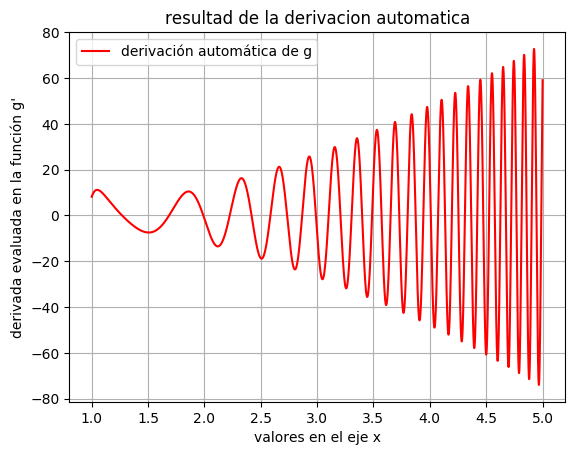

In [9]:
total=10000 #numero de datos por evaluar en la gráfica
particion=(5-1)/total #diviciones por hacer en la gráfica
x=[i=zero(eltype(particion)) for i=1:total]
y=[i=zero(eltype(particion)) for i=1:total]    #se generan los vectores con ceros en las entradas, uno para el eje x y el otro para la derivada
for i in 1:total
    x0=1+i*particion
    k=g(xdual(x0))
    x[i]=x0
    y[i]=k.der #valores de la derivada en ciclo for
end
using PyPlot
plot(x,y,color="red",label="derivación automática de g")
title("resultad de la derivacion automatica")
xlabel("valores en el eje x")
ylabel("derivada evaluada en la función g'")
legend(loc="best")
grid()
show()


---

## Ejercicio 3

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable (la función `newton1D` debe tener un argumento que es una función) a fin de encontrar un cero de la función, i.e., $f(x^*)=0$. El método de Newton requiere la derivada evaluada en diversos puntos, cosa que obtendrán usando el módulo de derivación automática.

- Obtengan, usando su función del método de Newton, las raices del polinomio de Wilkinson $W_{6}(x)$, usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

**a)**

In [10]:
W6(x)=(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)

W6 (generic function with 1 method)

In [11]:
function Newton(f,x0)
    absoluto=1.0
    while (absoluto> 1e-16) #condicion necesarias para hacer la iteración, en caso de encontrar la raíz, el programa
        #parará en automático
        c=f(xdual(x0))
        x0=x0-((c.fun)/(c.der))
        absoluto=abs(f(x0))
        println(x0)
    end
    return x0,absoluto
end

Newton (generic function with 1 method)

In [12]:
Newton(W6,2.20)

1.906527735212994
1.9930703843175974
1.9999491606343454
1.9999999972004447
2.0


(2.0,0.0)

Ahora, utilizando otra condición inicial en el polinomio de Wilkinson (x0=2.45)

In [13]:
Newton(W6,2.45)

6.888275882869115
6.5085056100300305
6.239432361284223
6.07723542628128
6.011116779705457
6.000273299604891
6.000000170412077
6.000000000000067
6.0


(6.0,0.0)

**b)**

In [14]:
h(x)=x*sin(2*x)

h (generic function with 1 method)

In [15]:
Newton(h,0.7)

0.13615112979555188
0.06721946042654862
0.03350805865645865
0.01674147533427841
0.008369173174403069
0.004184391173594745
0.002092171164715967
0.0010460825297421254
0.0005230408832985901
0.0002615203939528769
0.00013076019101439059
6.538009476193943e-5
3.269004728781274e-5
1.634502363226175e-5
8.172511814675298e-6
4.086255907155701e-6
2.043127953555107e-6
1.0215639767747104e-6
5.107819883869998e-7
2.5539099419345546e-7
1.276954970967222e-7
6.384774854836041e-8
3.192387427418012e-8
1.5961937137090047e-8
7.980968568545022e-9
3.990484284272511e-9


(3.990484284272511e-9,3.1847929646051787e-17)

---

## Pregunta

¿Qué hacer si se requieren derivadas de orden superior, es decir, la segunda, tercera, etc, derivada? Argumenten.

**NOTA:** Esta pregunta debe ser contestada pero **no** será considerada para aceptar la tarea, aunque sí se les dará retroalimentación respecto a lo que escriben. La idea es empezar a pensar en esto.

In [16]:
b(x)=x^3

b (generic function with 1 method)

In [17]:
b(xdual(1))

AD.Dual{Int64}(1,3)

Para ejecutarse la primera devirada, es necesario utilizar la función de *xdual(x)* en la función que se desea obtener su respectiva derivada, donde x es el punto donde se desea evaluar esta, por lo que, si se deseara obtener la segunda derivada sería evaluando dos veces el comando xdual.

In [18]:
xdual(xdual(1))

LoadError: StackOverflowError:

Desafortunadamente, al realizar esto, se genera un error ya que el primer *xdual* genera una tupla y no puede generarse una segunda tupla a partir de éste, por lo que sería necesario definir otro Dual como se hizo con xdual.
Ahora, si se desea obtener derivadas de orden "n" sería indispensable utilizar un ciclo for para ejecutar la derivación de forma iterada. Quizá metaprogramming pueda ser de ayuda en estos casos.

In [21]:
function scndder(f,x0)
    f(xdual(x0))
    q=f(xdual(x0)).der
    return (x0,)
end

scndder (generic function with 1 method)

, Any) in module Main at In[19]:2 overwritten at In[21]:2.


In [25]:
scndder(b,2)

(2,12)